<a href="https://colab.research.google.com/github/ch3262010/chava/blob/main/Chava's_Awesome_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chava's Awesome Project**




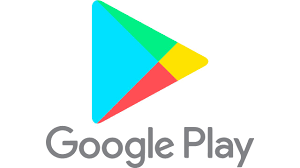




##**Introduction**

Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system.

Android Market was announced by Google on August 28, 2008

Applications are available through Google Play either free of charge or at a cost. They can be downloaded directly on an Android device through the proprietary Play Store mobile app or by deploying the application to a device from the Google Play website.

Google Play was launched on March 6, 2012, bringing together Android Market.

By 2017, Google Play featured more than 3.5 million Android applications.

[History of app growth](https://en.wikipedia.org/wiki/Google_Play#History_of_app_growth)

**This subject facinates me, and I would like to drill into the dataset and get a better grasp of the statistics, moreover in my humble opinion I think it's essential phase for each company who is planning to develop an app to invastigate and apply some research on the android market app. since billions of dollars are invested in this domain.**

**Therefore I have decided to expolre on my own the data, and to come to vital conclusions about this industry.**

The source of the data is from KAGGLE, The information comes in the table,
The table is full of details about apps in the Google Store, such as
In most columns the information is represented as numeric numbers
In some columns the information is represented as a string. (therefore, in preparing the data we converted them to int)

I have applied EDA and preprocessed the data for future statistics analytics.
The reasearch questions are listed below.

**Question #1**: Can we predict the popularity of an app based on given few features?

**Question #2**: Can we predict the number of apps in a given future year?




##1. Import relevant packages

In [82]:
!pip install plotly &> /dev/null
!pip install scikit-learn &> /dev/null
!pip uninstall scikit-learn -y &> /dev/null

!pip install -U scikit-learn &> /dev/null
!mkdir census_package &> /dev/null
!pip install geocoder &> /dev/null
!pip install squarify &> /dev/null
!pip install shap &> /dev/nul

In [83]:
import sklearn
from sklearn import metrics
from  sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import seaborn as sns
from google.colab import drive
import random
#py.init_notebook_mode(connected=True)

# importing visualization libraries
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot
%matplotlib inline
from IPython.display import HTML
import shap


## 1.2. Importing Dataset

In [84]:
!wget https://raw.githubusercontent.com/jasonchang0/kaggle-google-apps/master/google-play-store-apps/googleplaystore.csv

--2022-06-10 07:59:54--  https://raw.githubusercontent.com/jasonchang0/kaggle-google-apps/master/google-play-store-apps/googleplaystore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1360155 (1.3M) [text/plain]
Saving to: ‘googleplaystore.csv.1’

googleplaystore.csv 100%[===================>]   1.30M  --.-KB/s    in 0.05s   

2022-06-10 07:59:54 (24.0 MB/s) - ‘googleplaystore.csv.1’ saved [1360155/1360155]



In [85]:
df1 = pd.read_csv("/content/googleplaystore.csv")

**Introduction to Variable**
-----------------------------

**App:** Application name

**Category:** Category the app belongs to

**Rating**: Overall user rating of the app (as when scraped)

**Reviews:** Number of user reviews for the app (as when scraped)

**Size:** Size of the app (as when scraped)

**Installs:** Number of user downloads/installs for the app (as when scraped)

**Type:** Paid or Free

**Price:** Price of the app (as when scraped)

                                                                                      
**Genres:** An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
    Last Updated: Date when the app was last updated on Play Store (as when scraped)

**Current Ver:** Current version of the app available on Play Store (as when scraped)

**Android Ver:** Min required Android version (as when scraped)


For the following steps, in order to process the data in the machine learning algorithms, we need to first convert it from text to numbers, as from what i understand, most algorithms run better that way. From most of the books I've read, data cleaning/preprocessing is THE most important part of any machine learning process, as high quality data translates to high quality predictions and models.

## *2*. Preprocessing the data

Checking out the info, there's a not of null values that need to be addressed. Since my main objective is predicting the ratings of the apps, I deleted all the NaN values, just for simplicity sake.

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [87]:
df1.dropna(inplace = True)

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


For the following steps, in order to process the data in the machine learning algorithms, we need to first convert it from text to numbers, as from what i understand, most algorithms run better that way. From most of the books I've read, data cleaning/preprocessing is THE most important part of any machine learning process, as high quality data translates to high quality predictions and models.

### 2.1 Handling the categorical *columns*

From the categorical column, I converted each category into an individual number. In the later sections when we do apply machine learning, two methods will be applied to the code, being integer encoding(which we are doing now) and one-hot encoding, aka dummy variables.

The main reason as to why I understand we do this transformation is mainly because integer encoding relies on the fact that there's a relationship between each category(e.g. think age range vs types of animals). In this case however, it's hard to really determine such a relationship, hence dummy/one-hot encoding might help provide better predictive accuracy.

In [89]:
# Cleaning Categories into integers
CategoryString = df1["Category"]
categoryVal = df1["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df1["Category_c"] = df1["Category"].map(category_dict).astype(int)

Technically when doing the cleaning of genres, one-hot should also be applied in this instance. However, I did not as firstly, it's a subset of the categorical column and secondly, application of a dummy variable would significantly increase the number of independent variables.

So to combat this instead, we ran two seperate regressions, one including and one excluding such genre data. When including the data, we only considered in the impact/information provided via the genre section purely based on it's numeric value.

In [90]:
#Cleaning of genres
GenresL = df1.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df1['Genres_c'] = df1['Genres'].map(GenresDict).astype(int)

Cleaning of the prices of the apps to floats



In [91]:
df1['Price'] = df1['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df1['Price'] = df1['Price'].apply(lambda x: float(x))

In [92]:
# Removing punctuation and plus marks. So that the quantities become from string to int.

def get_number_from_string(my_string):
  if isinstance(my_string, str):
    my_string = my_string.replace(",","")
    my_string = my_string.replace("+","")
    number = int(my_string)
    return number

Cleaning of sizes of the apps and also filling up the missing values using ffill



In [93]:
# This function is responsible for converting measurments in column "Size" from either Mega and Kilo to Bytes.

def handle_size(str):
  if str[-1] == "M":
    return (float(str[:-1])*10**6)
  elif str[-1] == "k":
    return (float(str[:-1])*10**3)

This function is responsible for measuring the number of days passed from 2010 for each row in the column "Last Updated"


In [94]:
# This function is responsible for measuring the number of days passed from 2010 for each row in the column "Last Updated"

def handle_last_updated(str) :
    input_data = datetime.strptime(str, "%B %d, %Y")  
    lower_bound = datetime(2010, 1, 1, 0, 0)  
    return (input_data - lower_bound).days 

In [95]:
relevant_rows = df1['Installs']!= "Free"
relevant_rows
df1 = df1.loc[relevant_rows,:]

In [96]:
# 4.2 Invoking the preprocessing functions

# Run the command across the entire column
# get_number_from_string("80,000+")
df1["Installs"] = df1["Installs"].apply(lambda x:get_number_from_string(x))

#handle_size(df1.loc[0,"Size"]) 
df1["Size"] = df1["Size"].apply(lambda x:handle_size(x))

df1["Last Updated"] = df1["Last Updated"].apply(lambda x:handle_last_updated(x))

In [97]:
# convert reviews to numeric
df1['Reviews'] = df1['Reviews'].astype(int)

In [98]:
df1.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Category_c           0
Genres_c             0
dtype: int64

After we saw that the measure column is missing values ​​in 1637 cells.
We will fill those cells with the average value of all the values ​​in the column.

In [99]:
df1['Size'] = df1.Size.fillna(df1.Size.median())

In [100]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Category_c        0
Genres_c          0
dtype: int64

## 3.EDA - Exploratory data analysis

### 3.1 Checking the data size and the min-max values 

In [101]:

print("The data table size is:", df1.shape)
print("*"*100)
print("The columns name are:", df1.columns)
print("*"*100)
print("The  distibution values is:", df1["Type"].value_counts())
print("*"*100)
print("The average rating score of all apps is: ", df1["Rating"].mean())
print("*"*100)
print("The min rating score of all apps is: ", df1["Rating"].min())
print("*"*100)
print("The max rating score of all apps is: ", df1["Rating"].max())
print("*"*100)

print("Printing the first 5 rows of the table: ")
print(df1.head(n=5))
print("Printing the last 5 rows of the table: ")
print(df1.tail(n=5))

The data table size is: (9360, 15)
****************************************************************************************************
The columns name are: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Category_c', 'Genres_c'],
      dtype='object')
****************************************************************************************************
The  distibution values is: Free    8715
Paid     645
Name: Type, dtype: int64
****************************************************************************************************
The average rating score of all apps is:  4.191837606837612
****************************************************************************************************
The min rating score of all apps is:  1.0
****************************************************************************************************
The max rating score of all apps is:

### **3.2** Exploratory using graphs



####3.2.1  Graph #1: Basic EDA

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

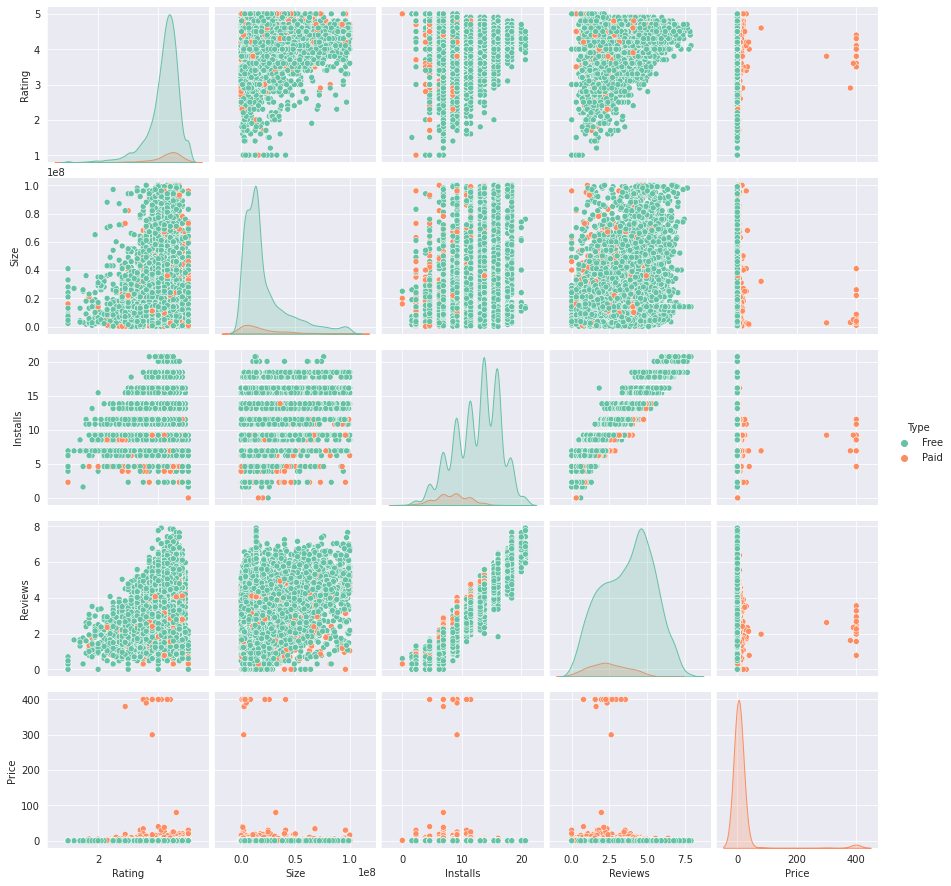

In [102]:
x = df1['Rating'].dropna()
y = df1['Size'].dropna()
z = df1['Installs'][df1.Installs!=0].dropna()
p = df1['Reviews'][df1.Reviews!=0].dropna()
t = df1['Type'].dropna()
price = df1['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

From the initial results we can immediately see an interesting result regarding columns: installations and ratings - there is a clear linear relationship - as the number of installations increases so does the amount of ratings and vice versa)

#### **3.2.2 Graph #2: The Distribution of paid and not paid apps in the app store**

let's look at how many percent of paid and free apps


In [103]:
column = 'Type'
grouped = df1[column].value_counts().reset_index()
grouped = grouped.rename(columns={column:'count','index':column})
print(grouped)
# Now plot the data
trace = go.Pie(labels=grouped[column],values=grouped['count'],pull=[0.05,0])
layout = {'title':'The Distribution of paid and not paid apps in the app store'}
fig = go.Figure(data=[trace],layout=layout)
iplot(fig)
# show it
plt.tight_layout()
plt.show()

   Type  count
0  Free   8715
1  Paid    645


<Figure size 432x288 with 0 Axes>

From the distribution we see that the percentage of free apps is about 93, compared to a total of 7 percent of paid apps

#### **3.2.3 Graph #3: The distribution of each ranking group**





In [104]:
vc=df1["Content Rating"].value_counts().reset_index()

vc.rename(columns={'Content Rating': 'count','index':"type" }, inplace=True)
vc['percent']=vc['count'].apply(lambda x : 100*x/sum(vc['count']))

vc=vc.sort_values("percent")
vc

trace = go.Bar(x=vc["type"], y=vc["percent"], name="Group", marker=dict(color="#6ad49b"))
#layout={'title':"The number of ",'xaxis':{'title':"x title"}}
layout={'title':'The size of each ranking group','xaxis':{'title':"Group name"}}
fig = go.Figure(data=trace, layout=layout)
iplot(fig)
# show it
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

We see from the graph that the "everyone" type rating group is the most popular.

####**3.2.4 Graph #4: Android market breakdown**

Which category has the highest share of (active) apps in the market? 



In [105]:
number_of_apps_in_category = df1['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')
# show it
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

####**3.2.5 Graph #5 Treemap**

**Lets make a treemap to see this a litte more**





- **Family** and **Game** apps have the highest market prevelance. 
- Interestingly, **Tools, Business and Medical** apps are also catching up.

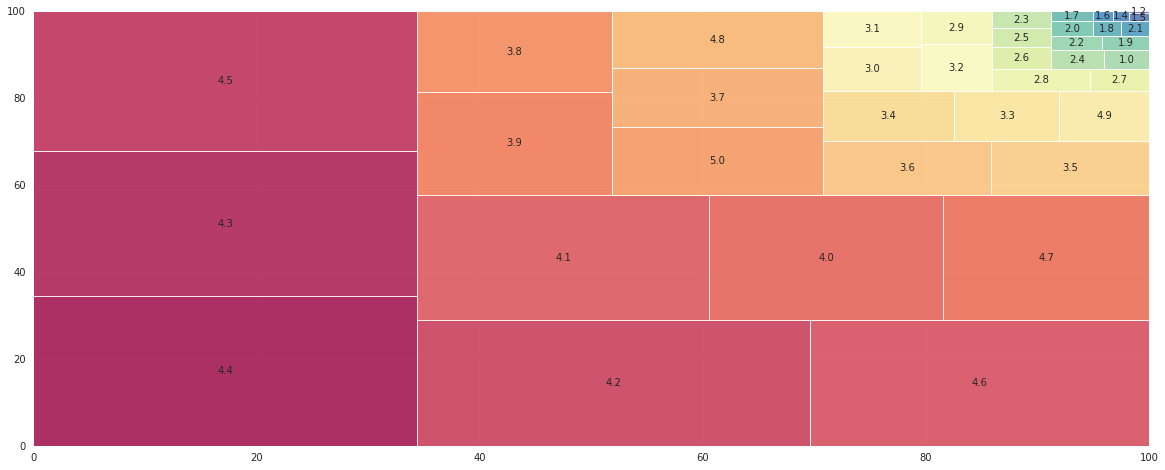

In [106]:
import squarify #for making treemap, we need squarify
plt.figure(figsize=(20,8))
labels = df1['Rating'].value_counts().index.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
squarify.plot(sizes = df1['Rating'].value_counts(), label = labels, color = colors, alpha = 0.8)

From the treemap, we can see that most of the apps had 4.3 as rating and 1.2 as leas



####**3.2.6 Graph #6 Average rating of apps**

Do any apps perform really good or really bad?

In [107]:
data = [go.Histogram(
        x = df1.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df1['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.191837606837612


Generally, most apps do well with an average rating of **4.17**.

Let's break this down and inspect if we have categories which perform exceptionally good or bad.

####3.3.1 Graph #7 **Sizing Strategy - Light Vs Bulky?**

How do app sizes impact the app rating?

In [108]:
groups = df1.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


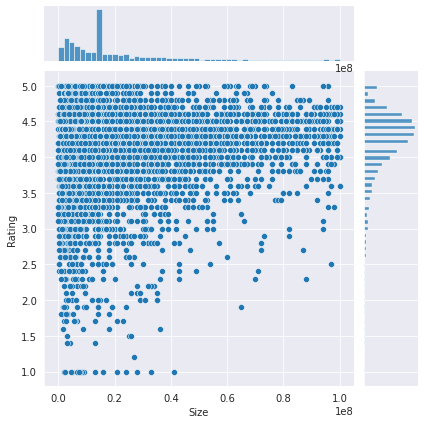

In [109]:
# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 8)
sns.set_style("darkgrid")
ax = sns.jointplot(df1['Size'], df1['Rating'])
#ax.set_title('Rating Vs Size')

We can easily notice apps which weight in the range of between 0 to 0.4x10^8 (**40MB**) the rating varies between 0 to 5.0,
which means there is no guarantee the app will recieve high rating. On the other hand we can easily notice, apps which weight above 0.8x10^8 ~(**80MB**) have a higher probablity to recive high scores from the users (the variance is much low).

In [110]:
subset_df = df1[df1.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)
groups_temp['Category'].value_counts().head(n=8)

FAMILY           1746
GAME             1097
TOOLS             733
PRODUCTIVITY      351
MEDICAL           350
COMMUNICATION     328
FINANCE           323
SPORTS            319
Name: Category, dtype: int64

####3.3.2 Graph #8 Pricing Strategy - Free Vs Paid?
How do app prices impact app rating?

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


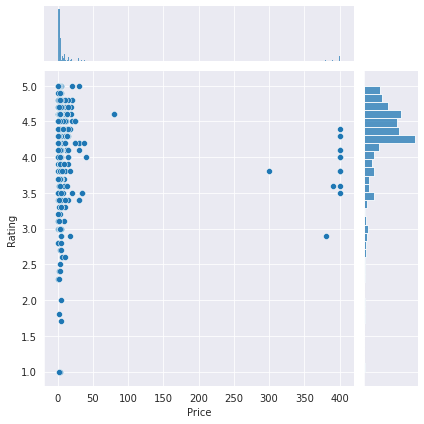

In [111]:
paid_apps = df1[df1.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

Most top rated apps are optimally priced between **~1\$ to ~30\$**. There are only a very few apps priced above 20\$.

Suprisingly we would expect that people who have **paid over 350$** would be pleased with the app, but we can see crystal clear that consumers have been 
dissatisfied with their purchase, no one has left a higher rating higher than **4.5**.

####3.3.3 Graph #9 Current pricing trend - How to price your app?

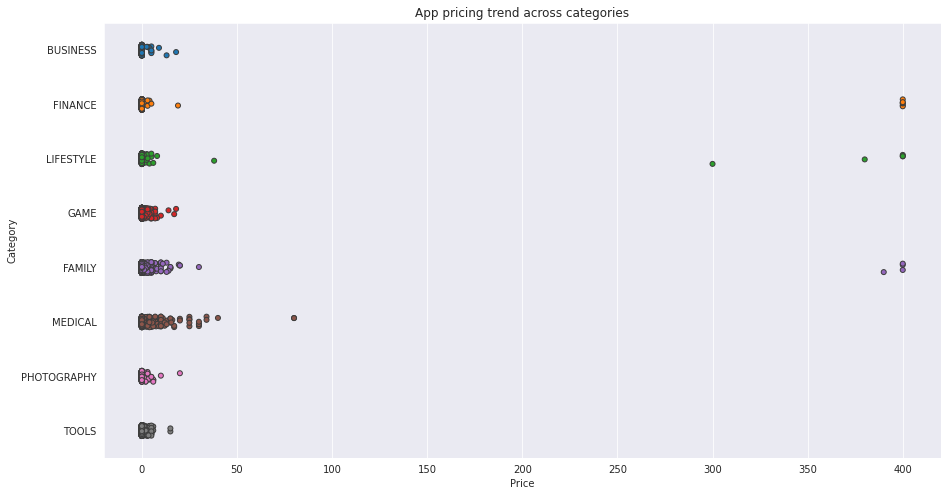

In [112]:
subset_df = df1[df1.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')


**I am Shocking to discover...Apps priced above 250\$ !!!** Let's quickly examine what these junk apps are.

In [113]:
subset_df.loc[subset_df['Price']>250,'Category'].value_counts()

FINANCE      6
LIFESTYLE    5
FAMILY       4
Name: Category, dtype: int64

**Let's focus on cheap apps and drill inside those apps, which the price tag is less than 100$:**

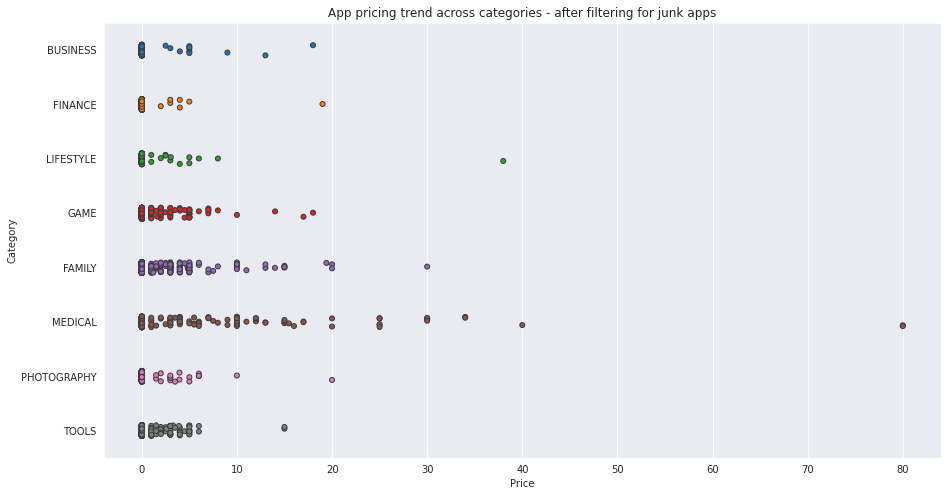

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<100]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

- Clearly, **Medical and Family apps** are the most expensive. Some medical apps extend even upto 80\$.


- All other apps are priced under 30\$.


- Surprisingly, **all game apps are reasonably priced below 20\$.**

####3.3.4 Distribution of paid and free apps across categories

In [115]:
#print(df1.head(n=5))
df1.Type.value_counts()
# groups = df1.groupby(['Category', 'Type'])

# for category_type, group in groups:
#   print("category_type: ", category_type)
#   print("group size: ", group.shape[0])

Free    8715
Paid     645
Name: Type, dtype: int64

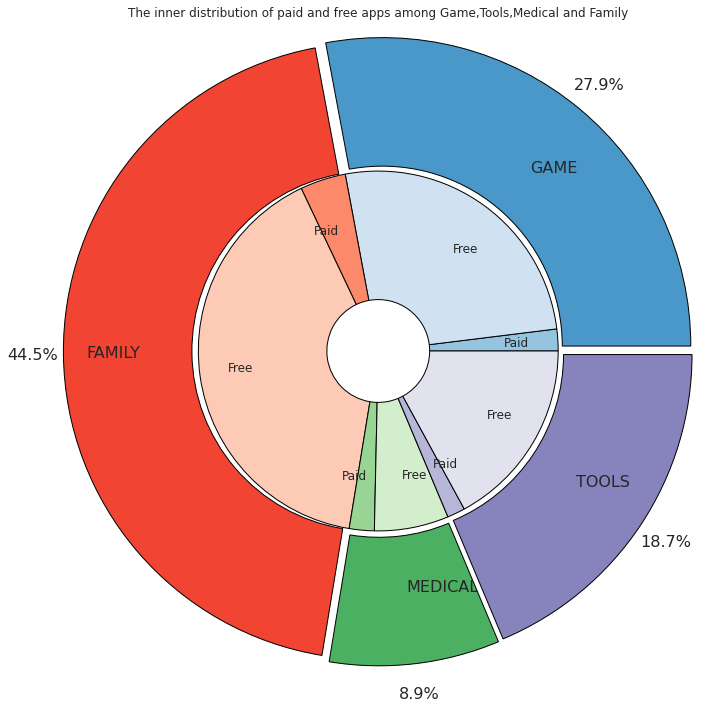

In [116]:
# Stacked bar graph for top 5-10 categories - Ratio of paid and free apps
#fig, ax = plt.subplots(figsize=(15,10))

new_df = df1.groupby(['Category', 'Type']).agg({'App' : 'count'}).reset_index()
#print(new_df)

# outer_group_names = df1['Category'].sort_values().value_counts()[:5].index
# outer_group_values = df1['Category'].sort_values().value_counts()[:5].values

outer_group_names = ['GAME', 'FAMILY', 'MEDICAL', 'TOOLS']
outer_group_values = [len(df1.App[df1.Category == category]) for category in outer_group_names]

a, b, c, d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]


inner_group_names = ['Paid', 'Free'] * 4
inner_group_values = []
#inner_colors = ['#58a27c','#FFD433']


for category in outer_group_names:
    for t in ['Paid', 'Free']:
        x = new_df[new_df.Category == category]
        try:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(int(x.App[x.Type == t].values[0]))
        except:
            #print(x.App[x.Type == t].values[0])
            inner_group_values.append(0)

explode = (0.025,0.025,0.025,0.025)
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, texts, _ = ax.pie(outer_group_values, radius=1.2, labels=outer_group_names, autopct='%1.1f%%', pctdistance=1.1,
                                 labeldistance= 0.75,  explode = explode, colors=[a(0.6), b(0.6), c(0.6), d(0.6)], textprops={'fontsize': 16})
plt.setp( mypie, width=0.5, edgecolor='black')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(inner_group_values, radius=1.2-0.5, labels=inner_group_names, labeldistance= 0.7, 
                   textprops={'fontsize': 12}, colors = [a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2), d(0.4), d(0.2)])
plt.setp( mypie2, width=0.5, edgecolor='black')
plt.margins(0,0)
 
# show it
plt.title("The inner distribution of paid and free apps among Game,Tools,Medical and Family")
plt.tight_layout()
plt.show()


####3.3.5 Graph #10 **Are paid apps downloaded as much as free apps?**

In [117]:
trace0 = go.Box(
    y=np.log10(df1['Installs'][df1.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    ),
    boxpoints='all'
)
trace1 = go.Box(
    y=np.log10(df1['Installs'][df1.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    ),
    boxpoints='all'
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

**Paid apps have a relatively lower number of downloads than free apps.** However, it is not too bad.There is no significant difference.

##4.Exploring Correlations

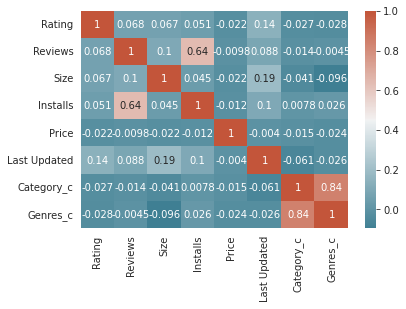

In [118]:
corrmat = df1.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


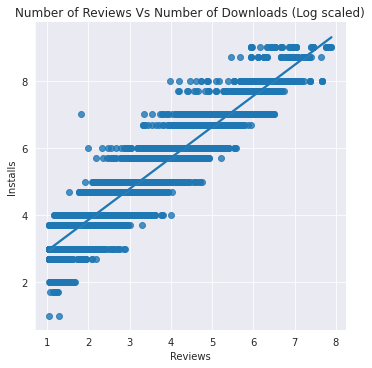

In [119]:
df_copy = df1.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df1['Installs'])
df_copy['Reviews'] = np.log10(df1['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

**A moderate positive correlation of 0.64 exists between the number of reviews and number of downloads.** This means that customers tend to download a given app more if it has been reviewed by a larger number of people. 

This also means that many active users who downloaded an app usually also leave back a review or feedback. 

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

**Step of preparing the data after graphs**

I prepared these values in the table after the graphs, because there were graphs that were not displayed correctly due to the change in values

In [120]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df1['Type'] = df1['Type'].map(type_cat)

Converting of the content rating section into integers. In this specific instance, given that the concent rating is somewhat relatable and has an order to it, we do not use one-hot encoding.

In [121]:
#Cleaning of content rating classification
RatingL = df1['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df1['Content Rating'] = df1['Content Rating'].map(RatingDict).astype(int)

In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   int64  
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   int64  
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   int64  
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
 13  Category_c      9360 non-null   int64  
 14  Genres_c        9360 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 1.4+ MB


I dropped these portions of information as i deemed it unecessary for our machine learning algorithm



Here we are building a linear regression model based on the the following columns:
'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Last Updated', 'Category_c', 'Category_numeric'

for predicting the Rating vector.

In [123]:
#dropping of unrelated and unnecessary items
df1.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [124]:
df1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [125]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df1, columns=['Category'])

In [126]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,0,0,0,0,0,0,0,0,0,0


##5.Reducing Dimension
Dimensionality reduction is way to reduce the complexity of a model and avoid overfitting. we will discuss the Principal Component Analysis (PCA) algorithm used to compress a dataset onto a lower-dimensional feature subspace with the goal of maintaining most of the relevant information.

The number of columns (features) before Dimension Reduction is:  8
[9.46602338e-01 5.27434959e-02 6.54166228e-04 1.35113768e-13
 2.83906071e-14 1.68140865e-15 6.74579367e-17 6.86686639e-18]


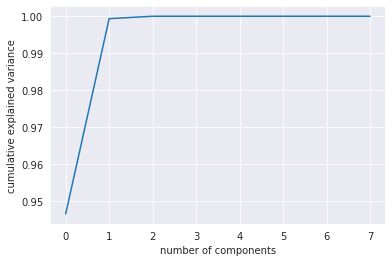

In [127]:
from sklearn.decomposition import PCA
X = df1.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df1.Rating
print("The number of columns (features) before Dimension Reduction is: ", X.shape[1])

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

print(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We have applied the PCA Algorithm, we have refered to the the field **"explained_variance_ratio_"**, which presents the Percentage of variance explained by each of the selected components.
As we can see most of the information can be spot in a single principal component. We can see there is no big difference between 3 components and above.

Now we would like to explore PCA with only 3 principal component, and see how the data is scattered in 3 dimension.

Before PCA we had 8 features after applying PCA we got only 3 Principal components


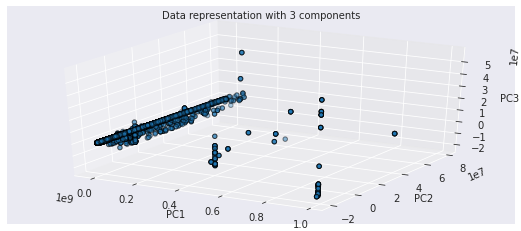

In [128]:
# Dimension Reduction:
pca = PCA(n_components=3)
x_res = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.set_title('Data representation with 3 components', fontsize=10)
ax.scatter(x_res[:, 0], x_res[:, 1], x_res[:, 2],cmap=plt.cm.nipy_spectral,marker='o',edgecolor="k")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.subplots_adjust(right=1.3)

print(f"Before PCA we had {X.shape[1]} features after applying PCA we got only 3 Principal components" )


##6.Making the Model

After our final checks for the preprocessing of our data, looks like we can start work! So the next question is what exactly are we doing and how are we doing it.

So the goal of this instance is to see if we can use existing data provided(e.g. File size, no of reviews) to predict the ratings of the google applications. In other words, our dependent variable Y, would be the rating of the apps.

One important factor to note is that the dependent variable Y, is a continuous variable(aka infinite no of combinations), as compared to a discrete variable. Naturally there are ways to convert our Y to a discrete variable but I decided to keep Y as a continuous variable for the purposes of this machine learning session.

Next question, what models should we apply and how should we evaluate them?

Model wise, I'm not too sure as well as there are like a ton of models out there that can be used for machine learning. Hence, I basically just chose the 3 most common models that I use, being linear regression, SVM, and random forest regressor.

we consider one-hot vs integer encoded results for the category section, as well as including/excluding the genre section. eventually we have trained 3 different models. 

We then evaluate the models by comparing the predicted results against the actual results graphically, as well as use the mean squared error, mean absolute error and mean squared log error as possible benchmarks. Moreover
The MSLE is usually used when we don't want to penalize the large differences in the predicted and the actual values when the predicted and the actual values are big numbers, in our case the numbers are quite small, but of curiosity we decided to explore this metric too.

The use of the error term will be evaluated right at the end after running through all the models.

let's use 3 different regression models with two different techniques on treating the categorical variable


So before we start, the following is code to obtain the error terms for the various models, for comparability.



In [129]:
#for evaluation of error term and 
def Evaluation_metrics(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [130]:
# print("df1.columns", list(df1.columns))
# print("df2.columns",list(df2.columns))

In [131]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

We start off by looking at linear regression model (without the genre label)



### 6.1.1 Linear Regression Model

In [132]:
#excluding Genre label
#Integer encoding

X = df1.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df1.Rating

# print(X.columns)
# print(df1.shape)
# print(X.shape)

y = pd.DataFrame(y)

# print(y.columns)
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
results = lr_model.predict(X_test)
print("The linear regression model without including the 'Category' column:")
Evaluation_metrics(y_test, results)

print('*'*100)
#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
lr_model2 = LinearRegression()
lr_model2.fit(X_train_d,y_train_d)
results_d = lr_model2.predict(X_test_d)
print("The linear regression model with including the 'Category' column:")
Evaluation_metrics(y_test, results_d)

The linear regression model without including the 'Category' column:
Mean Squared Error: 0.263357035717957
Mean absolute Error: 0.35896981635908365
Mean squared Log Error: 0.012848706987599491
****************************************************************************************************
The linear regression model with including the 'Category' column:
Mean Squared Error: 0.2726169964993335
Mean absolute Error: 0.36988955883464414
Mean squared Log Error: 0.013201562770533625


We can easily conclude from the metrics we got in the two models:

The first model is more accurate than the second model,
we see it's quite obvious by the results in all three metrics which the error of the first model is lower.
therefore we can easily conclude the Column 'Category' is not relevant for the prediction of Rating.


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


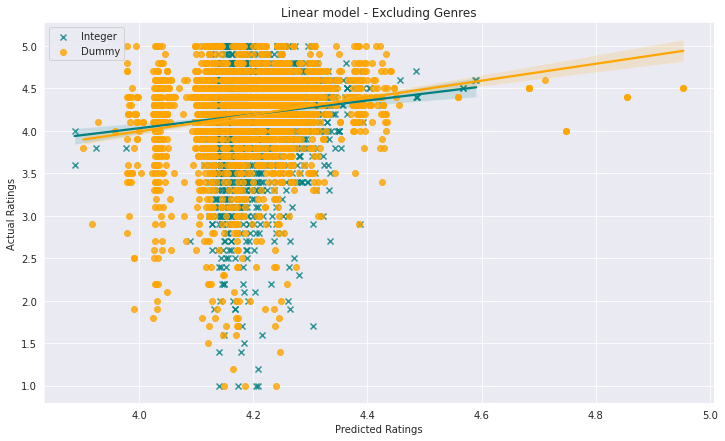

In [133]:
plt.figure(figsize=(12,7)) 
sns.regplot(results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(results_d,y_test_d,color='orange',label = 'Dummy') 
plt.legend() 
plt.title('Linear model - Excluding Genres') 
plt.xlabel('Predicted Ratings') 
plt.ylabel('Actual Ratings') 
plt.show()

In [134]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(results.mean()))
print ('Dummy encoding(mean) :'+ str(results_d.mean()))
print ('Integer encoding(std) :' + str(results.std()))
print ('Dummy encoding(std) :'+ str(results_d.std()))

Actual mean of population:Rating    4.191838
dtype: float64
Integer encoding(mean) :4.19452882492014
Dummy encoding(mean) :4.196909427883824
Integer encoding(std) :0.05727139088213843
Dummy encoding(std) :0.09953983536174618


###6.1.2 Linear Regression Model - SHAP


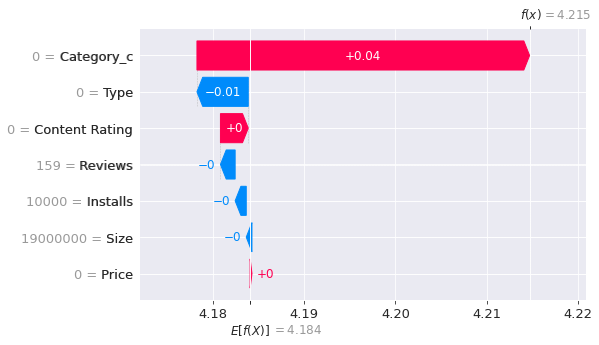

In [135]:
explainer = shap.explainers.Linear(lr_model, X)
shap_values = explainer(X)
 # visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

At first glance, it's hard to really see which model(dummy vs one-hot) is better in terms of predictive accuracy. What is striking however is the that at first glance, the dummy model seems favors the outcome of a lower rating compared to the integer model.

Although if we look at the actual mean of the predictive results, both are approximately the same, however the dummy encoded results have a much larger standard deviation as compared to the integer encoded model.

Next is looking at the linear model including the genre label as a numeric value.

###6.2.1 Linear Regression model 2

In [162]:
#Including genre label

#Integer encoding
X = df1.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df1.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lr_model3 = LinearRegression()
lr_model3.fit(X_train,y_train)
Results = lr_model3.predict(X_test)

#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results, name = 'Linear(inc Genre) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
lr_model4 = LinearRegression()
lr_model4.fit(X_train_d,y_train_d)
Results_d = lr_model4.predict(X_test_d)

#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear(inc Genre) - Dummy'),ignore_index = True)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


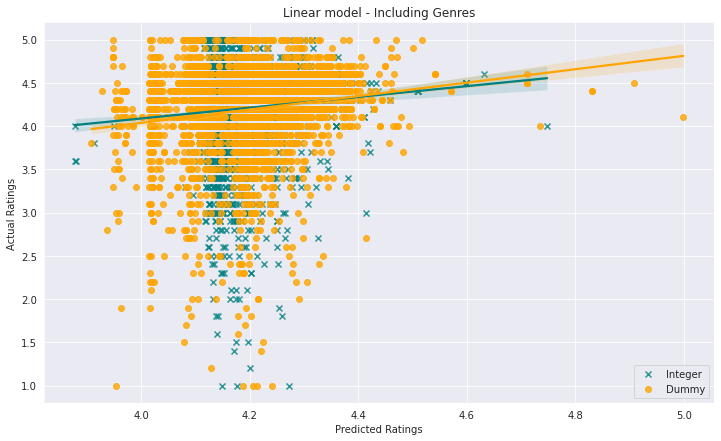

In [137]:
plt.figure(figsize=(12,7))
sns.regplot(Results,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [138]:
print ('Integer encoding(mean) :' + str(Results.mean()))
print ('Dummy encoding(mean) :'+ str(Results_d.mean()))
print ('Integer encoding(std) :' + str(Results.std()))
print ('Dummy encoding(std) :'+ str(Results_d.std()))

Integer encoding(mean) :4.185134858431463
Dummy encoding(mean) :4.195212202280837
Integer encoding(std) :0.06236123313464774
Dummy encoding(std) :0.10809351310657449


###6.2.2 Linear regression model 2 - SHAP

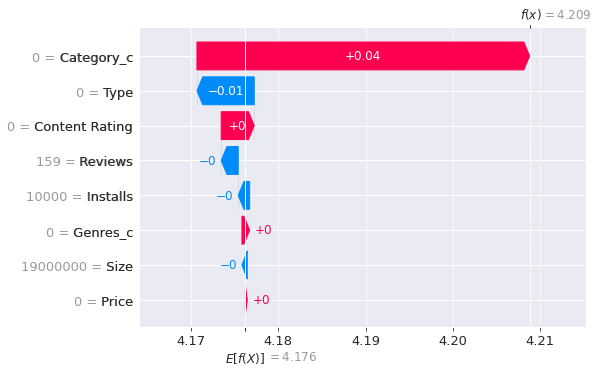

In [139]:
explainer = shap.explainers.Linear(lr_model3, X)
shap_values = explainer(X)
 # visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

When including the genre data, we see a slight difference in the mean between the integer and dummy encoded linear models. The dummy encoded model's std is still higher than the integer encoded model.

What's striking to me personally is that the dummy encoded regression line in the scatterplot is now flatter than the integer encoded regression line, which might suggest a "worse" outcome, given that usually you would want your regression's beta value to be closer to 1 than to 0.

**Next up is the SVM model**.

###6.3.1 SVM

In [140]:
#Excluding genres
from sklearn import svm
#Integer encoding

X1 = df1.drop(labels =  ['Category','Rating','Genres','Genres_c'],axis = 1)
print(X1.columns)
y = df1.Rating
X_train, X_test, y_train, y_test = train_test_split(X1.values, y.values, test_size=0.30)

svm_model1 = svm.SVR()
svm_model1.fit(X_train,y_train)

Results2 = svm_model1.predict(X_test)

#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM - Integer'),ignore_index = True)

#dummy based

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c',],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

svm_model2 = svm.SVR()
svm_model2.fit(X_train_d,y_train_d)

Results2_d = svm_model2.predict(X_test_d)

Evaluation_metrics(y_test_d, Results2_d)

#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2_d, name = 'SVM - Dummy'),ignore_index = True)

Index(['Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating',
       'Category_c'],
      dtype='object')
Mean Squared Error: 0.2537622823029421
Mean absolute Error: 0.3446245145677855
Mean squared Log Error: 0.012167597547975103


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


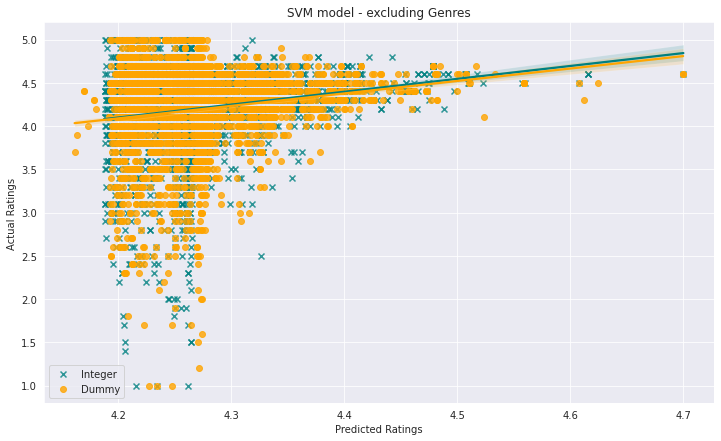

In [141]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [142]:
print ('Integer encoding(mean) :' + str(Results2.mean()))
print ('Dummy encoding(mean) :'+ str(Results2_d.mean()))
print ('Integer encoding(std) :' + str(Results2.std()))
print ('Dummy encoding(std) :'+ str(Results2_d.std()))

Integer encoding(mean) :4.269411602071852
Dummy encoding(mean) :4.273799435788895
Integer encoding(std) :0.059536452809754316
Dummy encoding(std) :0.060576344309932154


The results are quite interesting. Overall the model predicted quite a bit of ratings to be approximately at 4.2, even though the actual ratings were not. Looking at the scatterplot, the integer encoded model seems to have performed better in this instance.

As usual, the dummy encoded model has a higher std than the integer encoded model.

###6.3.2 SVM - SHAP

###6.4.1 SVM 2


In [143]:
#Integer encoding, including Genres_c
svm_model3 = svm.SVR()

X = df1.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df1.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

svm_model3.fit(X_train,y_train)

Results2a = svm_model3.predict(X_test)

#evaluation
#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2a, name = 'SVM(inc Genres) - Integer'),ignore_index = True)

#dummy encoding, including Genres_c
svm_model4 = svm.SVR()

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

svm_model4.fit(X_train_d,y_train_d)

Results2a_d = svm_model4.predict(X_test_d)

#evaluation
#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2a_d, name = 'SVM(inc Genres) - Dummy'),ignore_index = True)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


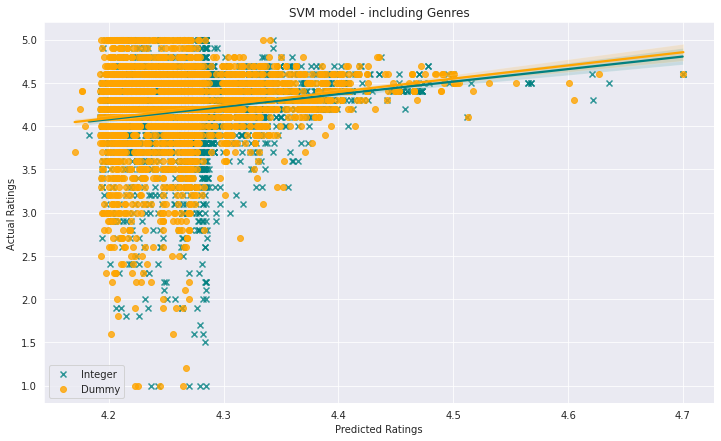

In [144]:
plt.figure(figsize=(12,7))
sns.regplot(Results2a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [145]:
print ('Integer encoding(mean) :' + str(Results2a.mean()))
print ('Dummy encoding(mean) :'+ str(Results2a_d.mean()))
print ('Integer encoding(std) :' + str(Results2a.std()))
print ('Dummy encoding(std) :'+ str(Results2a_d.std()))

Integer encoding(mean) :4.280248079174399
Dummy encoding(mean) :4.269466923160703
Integer encoding(std) :0.0564352827603679
Dummy encoding(std) :0.05851477518231308


With the inclusion of the genre variable, the dummy encoding model now seems to be performing better, as we see the regression line comparing the actual vs the predicted results to be very similar to that of the integer encoded model.

Furthermore the std of the dummy encoded model has fallen significantly, and now has a higher mean compared to the integer encoded model.



###6.4.2 SVM2 - SHAP

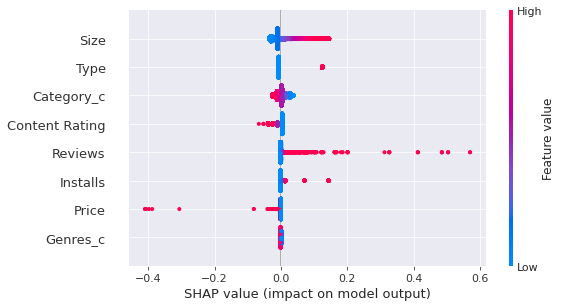

In [146]:
shap.summary_plot(shap_values, X)

**Next up is the random forest regressor model**. Honestly this is my favorite model as not only is it fast, it also allows you to see what independent variables significantly affect the outcome of the model.

###6.5.1 Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor

#Integer encoding
X = df1.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df1.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rfr_model1 = RandomForestRegressor(max_depth=10)
rfr_model1.fit(X_train,y_train)
Results3 = rfr_model1.predict(X_test)

#evaluation
#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'RFR - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
rfr_model2 = RandomForestRegressor()
rfr_model2.fit(X_train_d,y_train_d)
Results3_d = rfr_model2.predict(X_test_d)

#evaluation
#esultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3_d, name = 'RFR - Dummy'),ignore_index = True)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


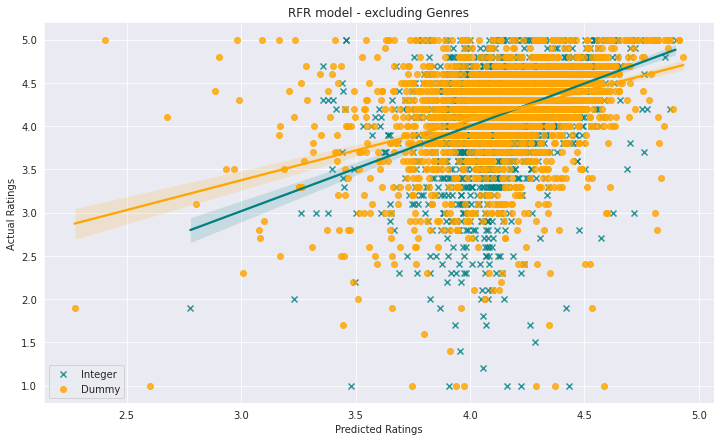

In [148]:
plt.figure(figsize=(12,7))
sns.regplot(Results3,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [149]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))

Integer encoding(mean) :4.187527570197128
Dummy encoding(mean) :4.192138716761633
Integer encoding(std) :0.21616452331655064
Dummy encoding(std) :0.2877917179428071


###6.5.2 Random Forest Regressor - SHAP

In [150]:
rfr_explainer = shap.TreeExplainer(rfr_model1)
print(X_train.shape)

shap_values = np.array(rfr_explainer.shap_values(X_train))
# print(X_train)

# # rfr_shap_values = shap_values.transpose((1, 0, 2))

# # np.allclose(
# #     rfr_model1.predict_proba(X_train),
# #     rfr_shap_values.sum(2) + explainer.expected_value
# # )

# shap.summary_plot(shap_values[3], X_train)

# shap.plots.waterfall(shap_values[0])

(6552, 7)


###6.5.3 Feature Importance

At first glance, I would say that the RFR model produced the best predictive results, just looking at the scatter graph plotted. Overall both models, the integer and the dummy encoded models seem to perform relatively similar, although the dummy encoded model has a higher overall predicted mean.



<Figure size 864x504 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

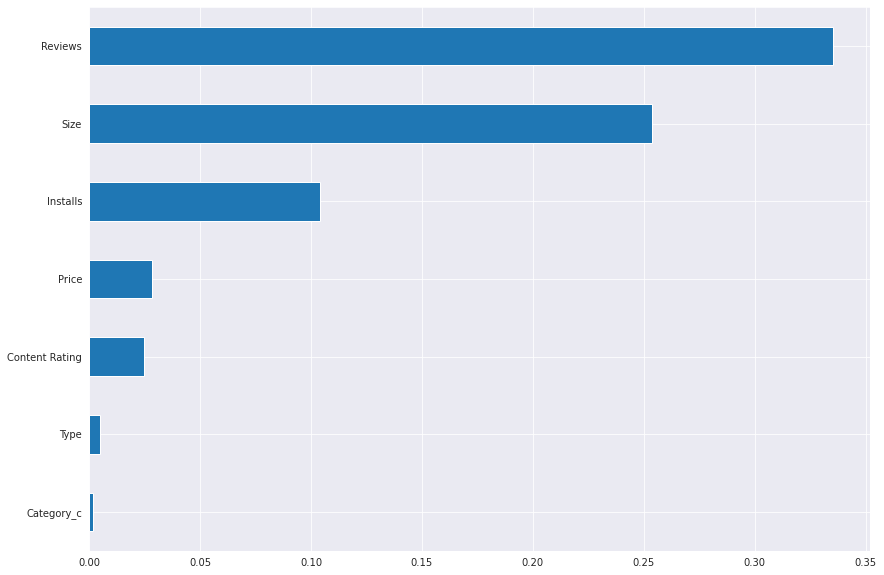

In [151]:
#for integer
plt.figure(figsize=(12,7))
Feat_impt = {}
for col,feat in zip(X.columns,rfr_model2.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()


If we look at what influences the ratings, the top 4 being reviews, size, category, and number of installs seem to have the highest influence. This is quite an interesting observation, while also rationalizable.



<Figure size 1008x720 with 0 Axes>

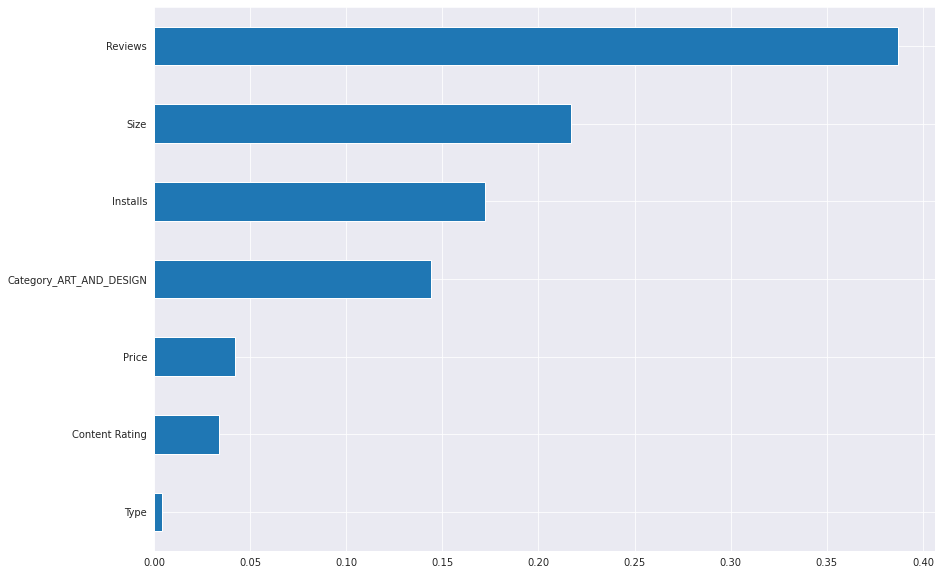

In [152]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,rfr_model1.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

Looking at the breakdown even further, it would seem that indeed Reviews, size and number of install remain as a significant contributer to the predictiveness of app ratings. What's interesting to me is that how the Tools category of apps have such a high level of predictiveness in terms of ratings, as say compared to the Food and Drink category.



###6.6.1 Random Forest Regressor2

In [153]:
#Including Genres_C

#Integer encoding
X = df1.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df1.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
rfr_model3 = RandomForestRegressor()
rfr_model3.fit(X_train,y_train)
Results3a = rfr_model3.predict(X_test)

#evaluation
#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a, name = 'RFR(inc Genres) - Integer'),ignore_index = True)

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
rfr_model4 = RandomForestRegressor()
rfr_model4.fit(X_train_d,y_train_d)
Results3a_d = rfr_model4.predict(X_test_d)

#evaluation
#resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a_d, name = 'RFR(inc Genres) - Dummy'),ignore_index = True)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


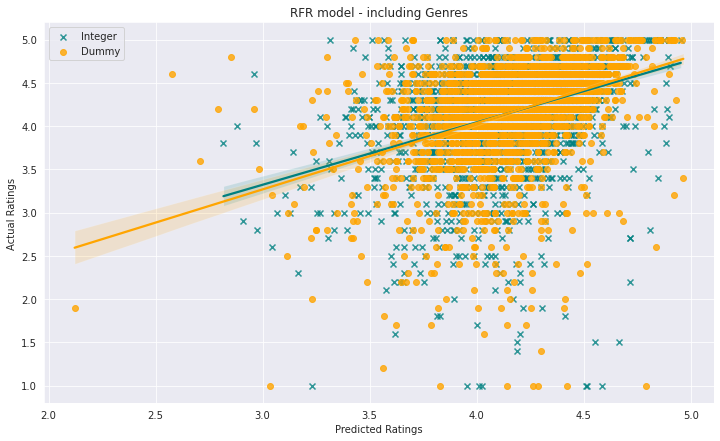

In [154]:
plt.figure(figsize=(12,7))
sns.regplot(Results3a,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results3a_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('RFR model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [155]:
print ('Integer encoding(mean) :' + str(Results3.mean()))
print ('Dummy encoding(mean) :'+ str(Results3_d.mean()))
print ('Integer encoding(std) :' + str(Results3.std()))
print ('Dummy encoding(std) :'+ str(Results3_d.std()))


Integer encoding(mean) :4.187527570197128
Dummy encoding(mean) :4.192138716761633
Integer encoding(std) :0.21616452331655064
Dummy encoding(std) :0.2877917179428071


Again with the inclusion of the genre variable, the results do not seem to defer significantly as compared to the previous results.



###6.6.2 Random Forest Regressor2-SHAP

<Figure size 1008x720 with 0 Axes>

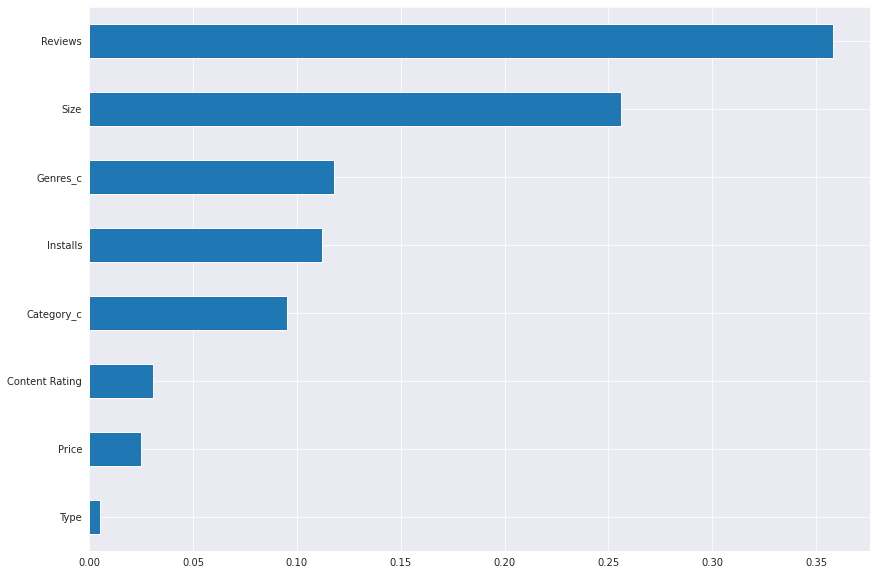

In [157]:
#for integer
Feat_impt = {}
for col,feat in zip(X.columns,rfr_model3.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

From the results, it would seem that the genre section actually plays an important part in the decision tree making. Yet the exclusion of it dosent seem to significantly impact results. This to me is quite interesting.

<Figure size 1008x720 with 0 Axes>

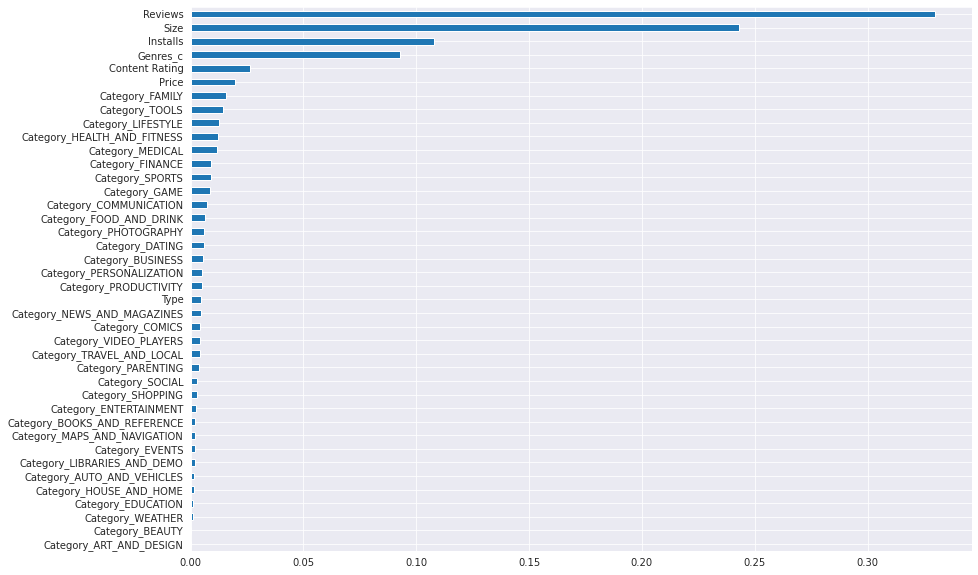

In [158]:
#for dummy
Feat_impt_d = {}
for col,feat in zip(X_d.columns,rfr_model4.feature_importances_):
    Feat_impt_d[col] = feat

Feat_impt_df_d = pd.DataFrame.from_dict(Feat_impt_d,orient = 'index')
Feat_impt_df_d.sort_values(by = 0, inplace = True)
Feat_impt_df_d.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_d.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

Finally, looking at the results, it is not easy to conclude which model has the best predictive accuracy and lowest error term. Using this round of data as a basis, the dummy encoded SVM model including genres has the lowest overall error rates, followed by the integer encoded RFR model including genes. Yet, all models seem to be very close in terms of it's error term, so this result is likely to change.

What is very surprising to me is how the RFR dummy model has such a significantly more error term compared to all the other models, even though on the surface it seemed to perform very similarly to the RFR integer model.

**Question #3**: Can we predict the price of an individual app by given few features?



**Question #4**: For maximizing the profit a company what would be the suggested Category for an app?

##**7.Summary - Result**

In [160]:
from google.colab import data_table
import pandas as pd

data_table.enable_dataframe_formatter()

my_data_states = {'Model name': ['Linear Regression 1', 'Linear Regression 2', 'SVM 1', 'SVM 2', 'Ronadom Forest Regressor 1', 'Ronadom Forest Regressor 1'],
    'RMSE': [0.263357035717957, "",0.2537622823029421, 2001, 2002, 2003]}

my_df1 = pd.DataFrame(my_data_states)
my_df2 = my_df1.T

data_table.DataTable(my_df2, include_index=True)




,0,1,2,3,4,5
Model name,Linear Regression 1,Linear Regression 2,SVM 1,SVM 2,Ronadom Forest Regressor 1,Ronadom Forest Regressor 1
RMSE,0.263357,,0.253762,2001,2002,2003


The Android market is 12 years old, it got huge success since many developers have been designing, developing apps.

According to an article which was published 3 months ago:
**"Mobile Apps Market Size To Grow By USD 653.91 billion"**
Therefore a lot of capital is going through those domains of mobile app developemnt. Some well known Israeli successful mobile apps are: Joytunes, and Lightricks.

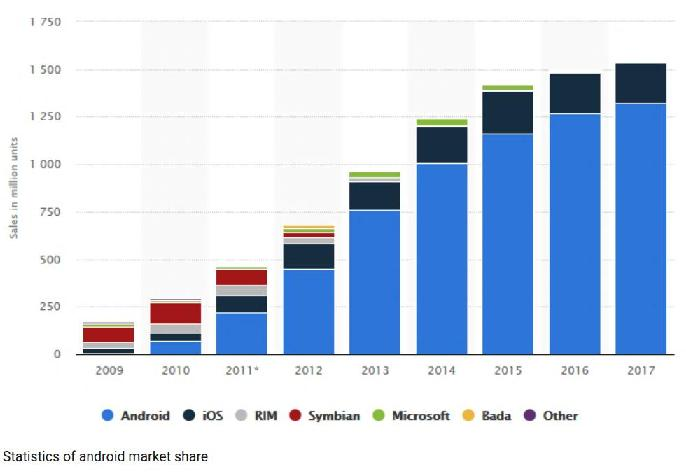

 As we have noticed most of the apps are free, in this project we have delve into the secret sauce of the rating metric.
we explored in depth the features for eatch app, and tried to predict a numeric value of the rating. We have built many types of regressor models (Linear Regressor, SVM, Random Forest Regressor), some of them where better than the rest. 


In conclusion, we were not able to answer all the questions we asked, but we have important conclusions for example: the higher the rating of the app, the more it was downloaded from the store,
The developer concludes that he must, that the user of the app will have great pleasure, and the developer will have to invest in the user's enjoyment ....
